In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [9]:
mtcars = pd.read_csv("http://peter.butka.website.tuke.sk/res/mtcars.csv")

In [5]:
mtcars1 = pd.read_csv("http://peter.butka.website.tuke.sk/res/mtcars.csv")

In [6]:
mtcars1 = mtcars1[["hp", "drat"]]

In [25]:
kmeans_result1 = KMeans(n_clusters = 2).fit(mtcars1)
kmeans_result1.cluster_centers_

array([[215.69230769,   3.30153846],
       [ 99.47368421,   3.79842105]])

In [34]:
k_predicted = kmeans_result1.predict(mtcars1)

In [35]:
pd.crosstab(k_predicted, mtcars.vs)

vs,0,1
row_0,,
0,13,0
1,5,14


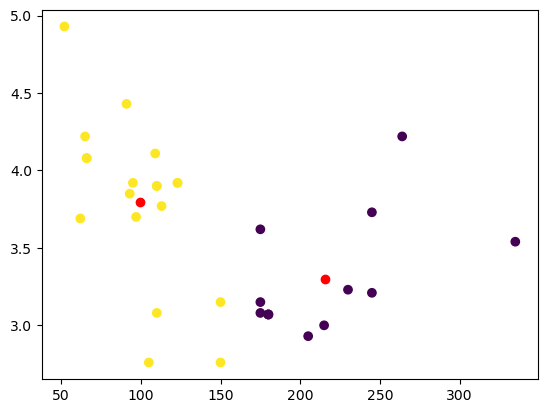

In [41]:
plt.scatter(mtcars1.hp, mtcars1.drat,c=k_predicted)
plt.scatter(kmeans_result1.cluster_centers_[:,0],kmeans_result1.cluster_centers_[:,1], c="red")

In [47]:
mtcars2 = mtcars[["mpg", "qsec"]]

In [64]:
hc2 = shc.linkage(mtcars2, method="average")

In [100]:
hc2

array([[14.        , 15.        ,  0.16      ,  2.        ],
       [ 4.        , 24.        ,  0.50089919,  2.        ],
       [16.        , 22.        ,  0.51419841,  2.        ],
       [ 0.        ,  1.        ,  0.56      ,  2.        ],
       [ 3.        , 20.        ,  0.57870545,  2.        ],
       [13.        , 34.        ,  0.73288379,  3.        ],
       [28.        , 30.        ,  0.80622577,  2.        ],
       [21.        , 37.        ,  0.88809282,  4.        ],
       [11.        , 12.        ,  0.92195445,  2.        ],
       [ 6.        , 23.        ,  1.08853112,  2.        ],
       [31.        , 36.        ,  1.12677083,  3.        ],
       [ 9.        , 33.        ,  1.31209534,  3.        ],
       [ 5.        , 10.        ,  1.3536617 ,  2.        ],
       [17.        , 19.        ,  1.56041661,  2.        ],
       [18.        , 27.        ,  1.62      ,  2.        ],
       [ 2.        , 42.        ,  1.64602573,  4.        ],
       [39.        , 40.

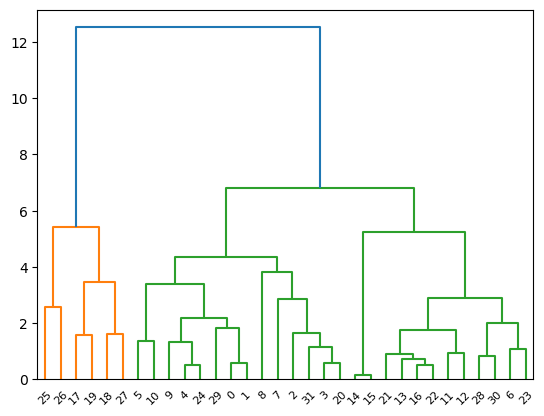

In [72]:
dn = dendrogram(hc2)

In [81]:
threshold = 6

clusters = shc.fcluster(hc2, threshold, criterion="distance")
mtcars2.groups = clusters

/tmp/ipykernel_116/2293843270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtcars2.groups = clusters
